In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 77% 125M/163M [00:00<00:00, 1.31GB/s]
100% 163M/163M [00:00<00:00, 1.20GB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/face-mask-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

 **Data Preprocessing**

In [5]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from PIL import Image

In [6]:


print(os.listdir('/content/data/'))


['with_mask', 'without_mask']


In [7]:
list_of_masked_images=os.listdir('/content/data/with_mask')
list_of_unmasked_images=os.listdir('/content/data/without_mask')
print(len(list_of_masked_images))  #number of masked images
print(len(list_of_unmasked_images)) #number of unmasked images

3725
3828


In [14]:
list_of_unmasked_images[10:17]

['without_mask_3099.jpg',
 'without_mask_3556.jpg',
 'without_mask_3166.jpg',
 'without_mask_3289.jpg',
 'without_mask_1695.jpg',
 'without_mask_3290.jpg',
 'without_mask_3331.jpg']

In [15]:
list_of_masked_images[0:5]

['with_mask_2682.jpg',
 'with_mask_2207.jpg',
 'with_mask_1971.jpg',
 'with_mask_2059.jpg',
 'with_mask_526.jpg']

In [16]:
#Creating labels for predictions

label1=[1]*3725 # 1 for masked
label2=[0]*3828 # 0 for unmasked
label=label1+label2; # merging both
len(label)

7553

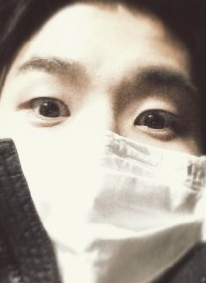

In [17]:

img=cv2.imread('/content/data/with_mask/with_mask_1152.jpg')
cv2_imshow(img)

In [18]:
with_mask_path="/content/data/with_mask/"
without_mask_path="/content/data/without_mask/"

In [19]:


data=[]
for single_image in list_of_masked_images:
  image=cv2.imread(with_mask_path+single_image)
  image=cv2.resize(image,(128,128))
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  data.append(image)

for single_image in list_of_unmasked_images:
  image=cv2.imread(without_mask_path+single_image)
  image=cv2.resize(image,(128,128))
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  data.append(image)


len(data)




7553

In [20]:
type(data)

list

In [21]:


import numpy as np
X=np.array(data)
y=np.array(label)

y[7546:7552]

array([0, 0, 0, 0, 0, 0])

In [22]:
X.shape

(7553, 128, 128, 3)

**Training the model**

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:


X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [25]:


number_of_classes=2;
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,312,961 (12.64 MB)

 Trainable params: 3,312,961 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
h=model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.7487 - loss: 0.5227 - val_accuracy: 0.8792 - val_loss: 0.3025
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8655 - loss: 0.3196 - val_accuracy: 0.9115 - val_loss: 0.2282
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9068 - loss: 0.2469 - val_accuracy: 0.9057 - val_loss: 0.2351
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9137 - loss: 0.2181 - val_accuracy: 0.9305 - val_loss: 0.1899
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9282 - loss: 0.1914 - val_accuracy: 0.9214 - val_loss: 0.2025
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9495 - loss: 0.1424 - val_accuracy: 0.9231 - val_loss: 0.2035
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9551 - loss: 0.1247 - val_accuracy: 0.9446 - val_loss: 0.1815
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9616 - loss: 0.1056 - val_acc

In [29]:
# Evaluating model for test data

loss,acc=model.evaluate(X_test_scaled,y_test)
acc
loss

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9434 - loss: 0.1716


0.1554678976535797

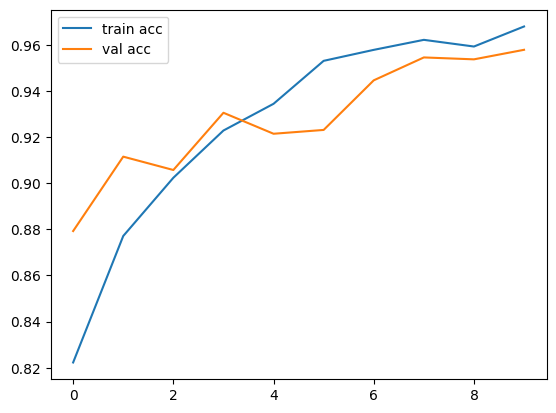

In [30]:
# Visualising accuracy

import matplotlib.pyplot as plt
plt.plot(h.history['accuracy'],label='train acc')
plt.plot(h.history['val_accuracy'],label='val acc')
plt.legend()

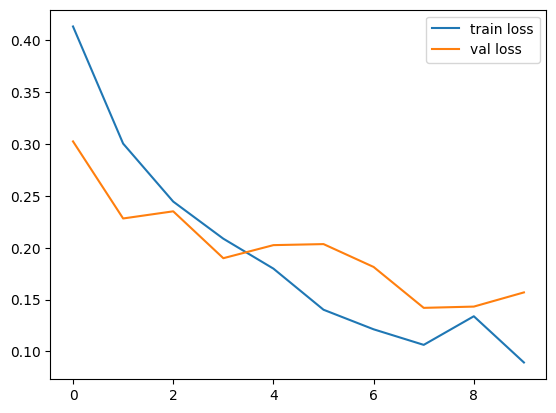

In [31]:
# Visualising  loss

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='val loss')
plt.legend()

**Prediction for single input image**

Path of the image: /content/data/with_mask/with_mask_1006.jpg


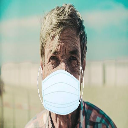

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
[[0.99475914]]
masked image


In [32]:


input_image = input("Path of the image: ")
input_r_image = cv2.imread(input_image)
image_sized = cv2.resize(input_r_image, (128, 128))
cv2_imshow(image_sized)
image_rgb = cv2.cvtColor(image_sized, cv2.COLOR_BGR2RGB)  # Match training
image_scaled = image_rgb / 255.0                           # Match normalization
image_reshaped = np.reshape(image_scaled, [1, 128, 128, 3])

prediction=model.predict(image_reshaped)
print(prediction)
score=prediction[0][0]
if(score>0.5):
  print("masked image")
else:
  print("unmasked image")


np.float32(0.9931814)

Path of the image: /content/data/without_mask/without_mask_1029.jpg


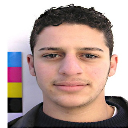

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[1.6648362e-09]]
unmasked image


In [33]:


input_image = input("Path of the image: ")
input_r_image = cv2.imread(input_image)
image_sized = cv2.resize(input_r_image, (128, 128))
cv2_imshow(image_sized)
image_rgb = cv2.cvtColor(image_sized, cv2.COLOR_BGR2RGB)  # Match training
image_scaled = image_rgb / 255.0                           # Match normalization
image_reshaped = np.reshape(image_scaled, [1, 128, 128, 3])

prediction=model.predict(image_reshaped)
print(prediction)
score=prediction[0][0]
if(score>0.5):
  print("masked image")
else:
  print("unmasked image")
